<a href="https://colab.research.google.com/github/joaomigueld3/natural-language-processing/blob/main/bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U spacy

In [2]:
!python -m spacy download 'pt_core_news_lg'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.pt.stop_words import STOP_WORDS

# Carregar modelo do SpaCy para a língua portuguesa
nlp = spacy.load('pt_core_news_lg')

# Função de pré-processamento
def preprocess_text(text):
    # Tokenização, POS, remoção de stopwords e lematização
    doc = nlp(text)
    #tokens = [token.text for token in doc if token.is_alpha]
    #tokens = [token.text for token in doc if token.is_alpha and token.text.lower() not in STOP_WORDS]
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text.lower() not in STOP_WORDS]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Exemplo de texto
texto = """No meio do caminho tinha uma pedra
tinha uma pedra no meio do caminho
tinha uma pedra
no meio do caminho tinha uma pedra.
Nunca me esquecerei desse acontecimento
na vida de minhas retinas tão fatigadas.
Nunca me esquecerei que no meio do caminho
tinha uma pedra
tinha uma pedra no meio do caminho
no meio do caminho tinha uma pedra."""

# Pré-processamento do texto
texto_preprocessado = preprocess_text(texto)
print("Texto original: ", texto)
print("Texto pré-processado: ", texto_preprocessado)

# Modelo Bag of Words
# O método fit_transform do CountVectorizer é usado para aprender o vocabulário e
# transformar o texto em uma matriz de contagem. Durante essa etapa, o vetorizador
# examina o texto pré-processado
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([texto_preprocessado])

# Resultado do modelo Bag of Words
print("\nVocabulário:")

#A função get_feature_names_out() retorna os nomes das features (palavras) presentes
# no vocabulário aprendido pelo vetorizador. Em outras palavras, ela fornece uma lista
# das palavras únicas que foram consideradas durante o processo de vetorização.
print(vectorizer.get_feature_names_out())

print("\nMatriz BoW:")
print(X.toarray())

Texto original:  No meio do caminho tinha uma pedra
tinha uma pedra no meio do caminho
tinha uma pedra
no meio do caminho tinha uma pedra.
Nunca me esquecerei desse acontecimento
na vida de minhas retinas tão fatigadas.
Nunca me esquecerei que no meio do caminho
tinha uma pedra
tinha uma pedra no meio do caminho
no meio do caminho tinha uma pedra.
Texto pré-processado:  ter pedra ter pedra ter pedra ter pedra esquecer acontecimento vida retina fatigado esquecer ter pedra ter pedra ter pedra

Vocabulário:
['acontecimento' 'esquecer' 'fatigado' 'pedra' 'retina' 'ter' 'vida']

Matriz BoW:
[[1 2 1 7 1 7 1]]


In [9]:
print(sorted(list(STOP_WORDS)))

['a', 'acerca', 'ademais', 'adeus', 'agora', 'ainda', 'algo', 'algumas', 'alguns', 'ali', 'além', 'ambas', 'ambos', 'antes', 'ao', 'aos', 'apenas', 'apoia', 'apoio', 'apontar', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'as', 'assim', 'através', 'atrás', 'até', 'aí', 'baixo', 'bastante', 'bem', 'boa', 'bom', 'breve', 'cada', 'caminho', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'com', 'como', 'comprida', 'comprido', 'conhecida', 'conhecido', 'conselho', 'contra', 'contudo', 'corrente', 'cuja', 'cujo', 'custa', 'cá', 'da', 'daquela', 'daquele', 'dar', 'das', 'de', 'debaixo', 'demais', 'dentro', 'depois', 'des', 'desde', 'dessa', 'desse', 'desta', 'deste', 'deve', 'devem', 'deverá', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'diante', 'direita', 'disso', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dá', 'dão', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'então', 'era', 

###Análise de Frequência de Palavras

Você pode analisar a frequência das palavras no texto para identificar as mais comuns. Isso pode ser feito criando um DataFrame do Pandas:

In [10]:
import pandas as pd

# Criar um DataFrame com as palavras e suas contagens
df_freq = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), X.toarray()[0])), \
                       columns=['Palavra', 'Contagem'])

# Ordenar por contagem em ordem decrescente
df_freq = df_freq.sort_values(by='Contagem', ascending=False)

# Exibir as 15 palavras mais frequentes
print(df_freq.head(15))

         Palavra  Contagem
3          pedra         7
5            ter         7
1       esquecer         2
2       fatigado         1
0  acontecimento         1
4         retina         1
6           vida         1


###Visualização com Nuvem de Palavras

Você pode usar bibliotecas como wordcloud para criar nuvens de palavras com base nas frequências das palavras no seu texto. Aqui está um exemplo básico:

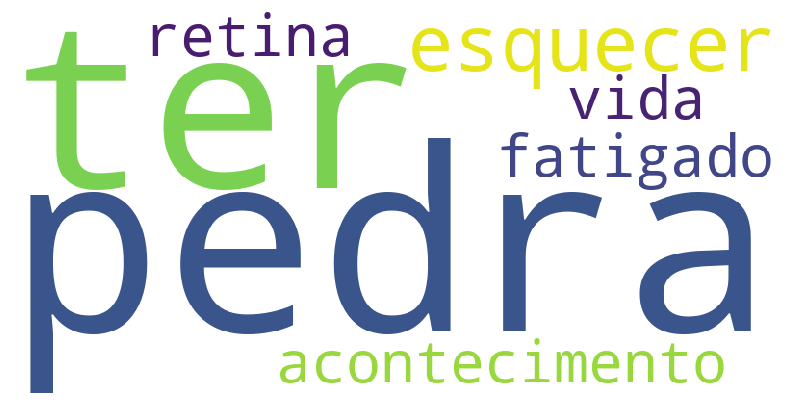

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Criar uma nuvem de palavras
#vectorizer.get_feature_names_out(): Obtém os nomes das features (palavras) do vocabulário.
#X.toarray()[0]: Obtém a contagem de ocorrências de cada palavra no texto,
#representado pela primeira linha da matriz BoW.
#zip(...): Combina os nomes das features com suas contagens correspondentes.
#dict(...): Converte o resultado em um dicionário de palavras e suas frequências.
#generate_from_frequencies(...): Gera a nuvem de palavras com base nas frequências.
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(
    dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0])))

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(10, 5))
#nearest, bicubic, none
plt.imshow(wordcloud, interpolation="nearest")
plt.axis("off")
plt.show()